# Lab 3 : Sudhan Shrestha 8889436

In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
# Getting the data
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

In [3]:
print(f"Shape of the data imported : \n")
print(f"diabetes_X Shape : {diabetes_X.shape}")
print(f"diabetes_y Shape : {diabetes_y.shape}")

# importing the feature names of the data
feature_names = datasets.load_diabetes().feature_names
print(f"\nFeature Names : {feature_names}")

Shape of the data imported : 

diabetes_X Shape : (442, 10)
diabetes_y Shape : (442,)

Feature Names : ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


## Converting the data into DataFrame

In [4]:
diabetes_X = pd.DataFrame(diabetes_X)
diabetes_X.columns = feature_names
diabetes_X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [5]:
#Converting for diabetes_y
diabetes_y = pd.DataFrame(diabetes_y)
diabetes_y.columns= ['Disease_Progression']
diabetes_y.head()

,Disease_Progression
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0


## Combining the two dataframe

In [6]:
diabetes = pd.concat([diabetes_X,diabetes_y], axis=1, join='inner')
diabetes

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


## Checking the number of null values in the data.

In [7]:
diabetes.isna().sum() # no null values

age                    0
sex                    0
bmi                    0
bp                     0
s1                     0
s2                     0
s3                     0
s4                     0
s5                     0
s6                     0
Disease_Progression    0
dtype: int64

## Stats for the data

In [8]:
# Stats for the data
diabetes.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Disease_Progression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [9]:
# Scatter plot 
fig = px.scatter(diabetes, x ='bmi', y ='Disease_Progression', color='age', hover_data=['bp'])
fig.show()

In [10]:
# Corealation
corr = diabetes.corr()
fig = px.imshow(corr,text_auto=True, aspect='auto')
fig.show()

In [27]:
# Modeling

X = np.array(diabetes['bmi']).reshape(-1,1)
# X

#X= diabetes.drop(labels='Disease_Progression', axis=1)# Dropping the Disease progression from the dataset
X


array([[ 0.06169621],
       [-0.05147406],
       [ 0.04445121],
       [-0.01159501],
       [-0.03638469],
       [-0.04069594],
       [-0.04716281],
       [-0.00189471],
       [ 0.06169621],
       [ 0.03906215],
       [-0.08380842],
       [ 0.01750591],
       [-0.02884001],
       [-0.00189471],
       [-0.02560657],
       [-0.01806189],
       [ 0.04229559],
       [ 0.01211685],
       [-0.0105172 ],
       [-0.01806189],
       [-0.05686312],
       [-0.02237314],
       [-0.00405033],
       [ 0.06061839],
       [ 0.03582872],
       [-0.01267283],
       [-0.07734155],
       [ 0.05954058],
       [-0.02129532],
       [-0.00620595],
       [ 0.04445121],
       [-0.06548562],
       [ 0.12528712],
       [-0.05039625],
       [-0.06332999],
       [-0.03099563],
       [ 0.02289497],
       [ 0.01103904],
       [ 0.07139652],
       [ 0.01427248],
       [-0.00836158],
       [-0.06764124],
       [-0.0105172 ],
       [-0.02345095],
       [ 0.06816308],
       [-0

In [31]:
y = np.array(diabetes['Disease_Progression'])
# y = diabetes.Disease_Progression
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [32]:
# Creating train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)


In [33]:
print(f"Shape of train_X: {X_train.shape}")
print(f"Shape of test_X: {X_test.shape}")
print(f"Shape of train_y: {y_train.shape}")
print(f"Shape of test_y: {y_test.shape}")

Shape of train_X: (353, 1)
Shape of test_X: (89, 1)
Shape of train_y: (353,)
Shape of test_y: (89,)


In [34]:
# creating the instance of the model & fitting
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [35]:
predict_y = model.predict(X_test)
predict_y

array([155.8592353 , 228.33052685, 138.00398955, 105.44442379,
       219.92805826, 274.54410406,  94.94133806,  97.0419552 ,
       120.14874381, 210.4752811 , 153.75861815, 134.85306384,
       182.11694963, 151.65800101, 259.83978404, 121.19905238,
       190.51941821,  94.94133806, 127.50090382, 136.95368098,
       209.42497253, 222.02867541, 113.84689237, 164.26170388,
       132.75244669, 198.9218868 , 223.07898398, 128.5512124 ,
       113.84689237, 214.67651539, 235.68268686,  87.58917804,
        84.43825232, 120.14874381, 154.80892673, 161.11077816,
       171.6138639 , 168.46293818, 124.3499781 , 131.70213812,
       205.22373824, 128.5512124 , 206.27404681, 128.5512124 ,
       195.77096108, 140.1046067 , 173.71448104, 212.57589825,
       107.54504093, 159.01016102, 211.52558968, 205.22373824,
       156.90954387, 128.5512124 , 174.76478961, 122.24936096,
       114.89720095, 104.39411521, 136.95368098, 187.36849249,
       128.5512124 , 192.62003536, 144.30584099, 194.72

In [36]:
print(X_train.shape)
print(y_train.shape)

(353, 1)
(353,)


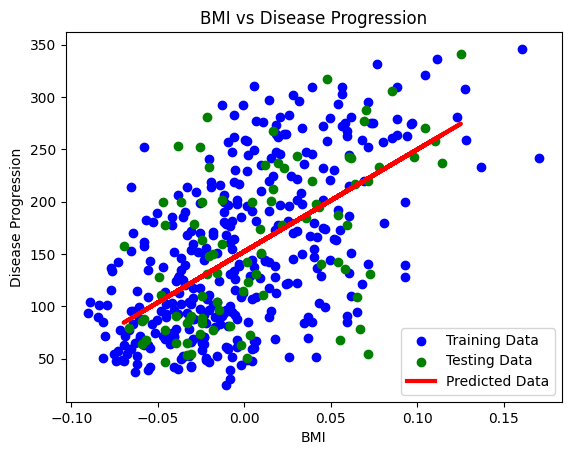

In [45]:
# Plotting
plt.scatter(X_train,y_train, color='blue', label="Training Data")
plt.scatter(X_test, y_test, color= 'green', label="Testing Data")
plt.plot(X_test,predict_y,color= 'red', linewidth=3, label="Predicted Data")
plt.title("BMI vs Disease Progression")
plt.xlabel("BMI")
plt.ylabel("Disease Progression")
plt.legend()
plt.show()

In [ ]:
# coefficient & intercept
m_coff = pd.Series(model.coef_, index = X.columns)
m_intcpt = model.intercept_

print(f"The coefficient :\n{m_coff}\n\nThe intercept is : {m_intcpt}")

# Mean Squared Error
mse = metrics.mean_squared_error(y_test, predict_y)
print('Mean squared error: %.2f' % mse)

The coefficient :
age     -9.158653
sex   -205.454322
bmi    516.693745
bp     340.619999
s1    -895.552002
s2     561.220679
s3     153.893110
s4     126.731397
s5     861.127002
s6      52.421122
dtype: float64

The intercept is : 151.88331005254167
Mean squared error: 3094.46
